In [1]:
!pip install pyproj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 99.3 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from pyproj import Transformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gdown

In [3]:
ID = "https://drive.google.com/drive/folders/1RZJdNpCfbMt2SB_kfWsxQgOk5LeuV7lw"
gdown.download_folder(ID, quiet=True)
main_df = pd.read_csv('Divar Dataset/Divar.csv', low_memory=False)

In [4]:
divar_df = main_df.copy()

In [6]:
 divar_df

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01 00:00:00,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0
999996,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01 00:00:00,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0
999997,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01 00:00:00,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01 00:00:00,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,NaN,...,NaN,5.0,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN


In [ ]:
divar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

### bilding_size

In [5]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['building_size'].to_numpy()))
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['building_size'].isna()), 'building_size'] = mean

/tmp/ipython-input-3681495114.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['building_size'].to_numpy()))


### floor

In [6]:
divar_df['floor'] = divar_df['floor'].apply(lambda x: np.float64(30) if x == '30+' else np.float64(x))

In [7]:
for cat3 in divar_df['cat3_slug'].unique() :
    if divar_df[divar_df['cat3_slug'] == cat3]['floor'].isnull().sum() > 100 :
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['floor'].isna()), 'floor'] = 0
    else :
        mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['floor'].to_numpy()))
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['floor'].isna()), 'floor'] = mean

/tmp/ipython-input-2803813171.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['floor'].to_numpy()))


### rooms_count

In [8]:
def rooms_counts_convertor(rooms_count) :
    if rooms_count == 'یک' :
        return 1
    elif rooms_count == 'دو' :
        return 2
    elif rooms_count == 'سه' :
        return 3
    elif rooms_count == 'چهار' :
        return 4
    elif rooms_count == 'پنج یا بیشتر' :
        return 5
    elif rooms_count == 'بدون اتاق' :
        return 0

divar_df['rooms_count'] = divar_df['rooms_count'].apply(lambda x: rooms_counts_convertor(x))

In [9]:
for cat3 in divar_df['cat3_slug'].unique() :
    if cat3 == 'plot-old' :
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['rooms_count'].isna()), 'rooms_count'] = 0
    else :
        mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))
        divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['rooms_count'].isna()), 'rooms_count'] = mean

/tmp/ipython-input-622566082.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))
/tmp/ipython-input-622566082.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))
/tmp/ipython-input-622566082.py:5: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(divar_df[divar_df['cat3_slug'] == cat3]['rooms_count'].to_numpy()))


### construction_year

In [10]:
persian_to_english = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")
def convert(x):
    if 'قبل' in str(x):
        return 1369
    elif not pd.notna(x) : return x
    return int(str(x).translate(persian_to_english))

divar_df['construction_year'] = divar_df['construction_year'].apply(convert)

In [11]:
divar_df.loc[divar_df['cat3_slug'] == 'plot-old', 'construction_year'] = 1370

In [12]:
for cat3 in divar_df['cat3_slug'].unique() :
    mean = np.round(np.nanmean(
        divar_df[(divar_df['cat3_slug'] == cat3)]['construction_year'].to_numpy()
    ))
    divar_df.loc[(divar_df['cat3_slug'] == cat3) & (divar_df['construction_year'].isna()), 'construction_year'] = mean

/tmp/ipython-input-4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(
/tmp/ipython-input-4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(
/tmp/ipython-input-4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(
/tmp/ipython-input-4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(
/tmp/ipython-input-4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(
/tmp/ipython-input-4002084911.py:2: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(


### lux feature

In [13]:
lux_columns = ['has_balcony', 'has_security_guard', 'has_barbecue', 'has_pool', 'has_jacuzzi', 'has_sauna']

In [14]:
for col in lux_columns :
    print(col, divar_df[col].unique())

has_balcony [nan 'true' 'false' 'unselect' 'True' 'False']
has_security_guard [nan False True]
has_barbecue [nan False True]
has_pool [nan False True]
has_jacuzzi [nan False True]
has_sauna [nan False True]


In [15]:
def has_balcony_convertor(x) :
    if (x == True) or (x == 'true') : return 1
    else : return 0

divar_df['has_balcony'] = divar_df['has_balcony'].apply(lambda x: has_balcony_convertor(x))

In [16]:
for col in lux_columns :
    if col != 'has_balcony' :
        divar_df[col].fillna(False, inplace=True)
        divar_df.loc[divar_df[col] == False, col] = 0
        divar_df.loc[divar_df[col] == True, col] = 1

/tmp/ipython-input-2296387092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  divar_df[col].fillna(False, inplace=True)
/tmp/ipython-input-2296387092.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  divar_df[col].fillna(False, inplace=True)
/tmp/ipython-input-2296387092.py:4: FutureWarning: Setting an it

In [18]:
divar_df['lux_count'] = divar_df[lux_columns].sum(axis=1)

### necessary_count

In [17]:
necessary_columns = ['has_elevator', 'has_warehouse', 'has_parking', 'has_restroom', 'has_warm_water_provider']

In [19]:
for col in necessary_columns :
    print(col, divar_df[col].unique())

has_elevator [nan True False]
has_warehouse [nan True False]
has_parking [nan True False]
has_restroom [nan 'squat_seat' 'squat' 'seat' 'unselect']
has_warm_water_provider [nan 'package' 'water_heater' 'powerhouse' 'unselect']


In [20]:
def has_rest_room_convertor(x) :
    if (x == 'squat_seat') or (x =='squat') or (x == 'seat') :
        return 1
    else : return 0

divar_df['has_restroom'] = divar_df['has_restroom'].apply(lambda x: has_rest_room_convertor(x))

In [21]:
def has_warm_water_provider_convertor(x) :
    if (x == 'package') or (x == 'water_heater') or (x == 'powerhouse') :
        return 1
    else : return 0

divar_df['has_warm_water_provider'] = divar_df['has_warm_water_provider'].apply(lambda x: has_warm_water_provider_convertor(x))


In [22]:
for col in necessary_columns :
    if (col != 'has_restroom') or (col != 'has_warm_water_provider') :
        divar_df[col].fillna(False, inplace=True)
        divar_df.loc[divar_df[col] == False, col] = 0
        divar_df.loc[divar_df[col] == True, col] = 1

/tmp/ipython-input-3146086497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  divar_df[col].fillna(False, inplace=True)
/tmp/ipython-input-3146086497.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  divar_df[col].fillna(False, inplace=True)
/tmp/ipython-input-3146086497.py:4: FutureWarning: Setting an it

In [23]:
divar_df['necessary_count'] = divar_df[necessary_columns].sum(axis=1)

### final_price

In [24]:
divar_df['final_price'] = np.where(divar_df['price_value'].notna(), divar_df['price_value'],
    np.where((divar_df['transformable_credit'].notna()) | (divar_df['transformable_rent'].notna()),
        ((divar_df['transformable_credit'].fillna(0) * 30000) / 1000000) + divar_df['transformable_rent'].fillna(0), np.nan)
            )

### lat, lang

In [25]:
group_means = divar_df.groupby("neighborhood_slug")["location_latitude"].transform("mean")
divar_df["location_latitude"] = divar_df["location_latitude"].fillna(group_means)

group_means = divar_df.groupby("neighborhood_slug")["location_longitude"].transform("mean")
divar_df["location_longitude"] = divar_df["location_longitude"].fillna(group_means)

### cleaning

In [26]:
columns = ['building_size', 'floor', 'rooms_count', 'construction_year', 'final_price', 'lux_count', 'necessary_count', 'cat3_slug', 'location_latitude', 'location_longitude']

In [27]:
df = divar_df[columns].copy()

In [28]:
df.dropna(inplace=True)

In [29]:
df['final_price_log'] = np.log1p(df['final_price'])

### model

In [30]:
columns = ['building_size', 'floor', 'rooms_count', 'construction_year', 'final_price', 'lux_count', 'necessary_count', 'location_latitude', 'location_longitude']
df = divar_df[columns].copy()
df.dropna(inplace=True)
df['final_price_log'] = np.log1p(df['final_price'])

Q1 = df['final_price_log'].quantile(0.25)
Q3 = df['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['final_price_log'] >= lower) & (df['final_price_log'] <= upper)]

df_clean.dropna(inplace=True)

num_cols = ['building_size', 'floor', 'rooms_count', 'construction_year', 'final_price_log']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[num_cols])

df_scaled = pd.DataFrame(scaled_data, columns=num_cols, index=df_clean.index)

df_final = pd.concat([df_scaled, df[['location_latitude', 'location_longitude', 'lux_count', 'necessary_count']]], axis=1)

/tmp/ipython-input-4044962102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [31]:
df_final.dropna(inplace=True)

In [32]:
X = df_final

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(X)

sample_idx = np.random.choice(len(X), size=200000, replace=False)

X_sample = X.iloc[sample_idx].values
cluster_sample = df_final['cluster'].iloc[sample_idx].values

score = silhouette_score(X_sample, cluster_sample)
print("Silhouette Score (sampled):", score)

Silhouette Score (sampled): 0.4362530721541491


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


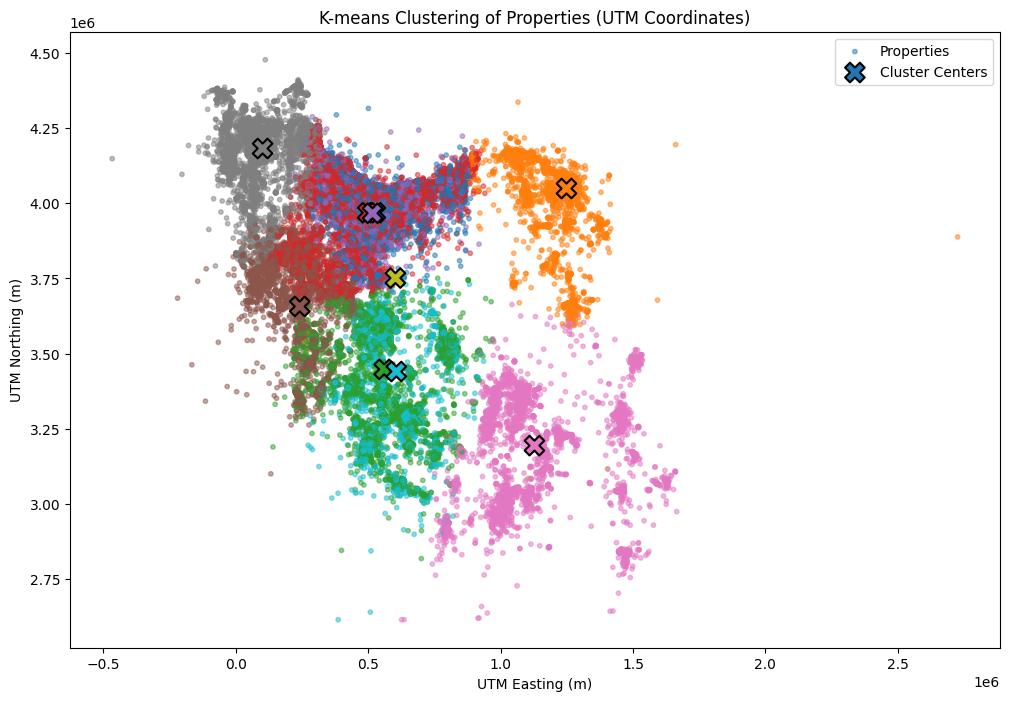

In [116]:
transformer = Transformer.from_crs("epsg:4326", "epsg:32639", always_xy=True)

df_final['UTM_E'], df_final['UTM_N'] = transformer.transform(
    df_final['location_longitude'].values,
    df_final['location_latitude'].values
)

# مراکز خوشه‌ها هم به UTM تبدیل کنیم
centroids = kmeans.cluster_centers_

# برای نمایش مراکز روی نقشه، لازم داریم مختصات مرکز خوشه‌ها در UTM
# چون ما latitude/longitude رو از فیچرها حذف کردیم، اینجا فقط قیمته → پس برای نمایش ساده‌تر فقط X=final_price_log و Y=neighborhood_encoded رو نمی‌خوایم
# پس مراکز جغرافیایی رو از داده‌ی اصلی محاسبه می‌کنیم
centroids_geo = df_final.groupby('cluster')[['UTM_E','UTM_N']].mean().reset_index()

# رسم نمودار
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_final['UTM_E'], df_final['UTM_N'],
                      c=df_final['cluster'], cmap='tab10', alpha=0.5, s=10, label="Properties")

# رسم مراکز خوشه‌ها
plt.scatter(centroids_geo['UTM_E'], centroids_geo['UTM_N'],
            c=centroids_geo['cluster'], cmap='tab10',
            marker='X', s=200, edgecolor='black', linewidth=1.5, label="Cluster Centers")

# عنوان و برچسب محور
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM Coordinates)")

# legend و colorbar
plt.legend()
plt.show()

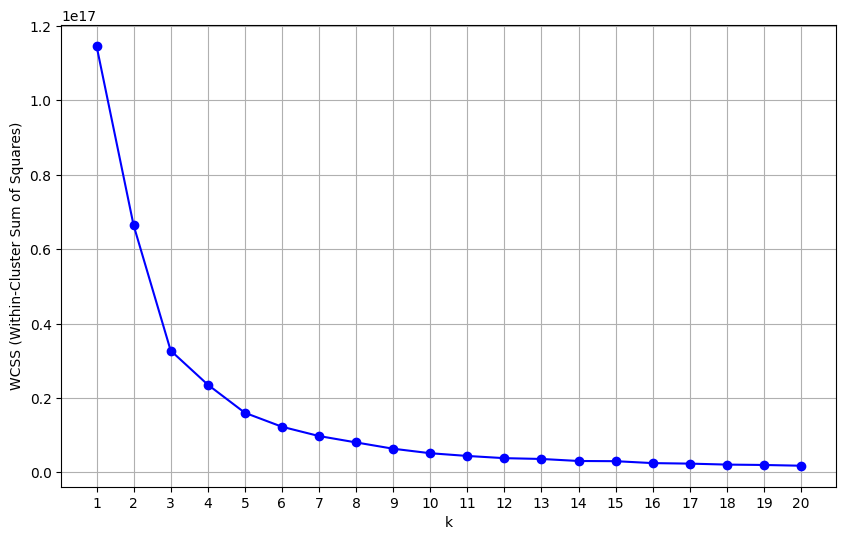

In [118]:
X = df_final

wcss = []
K = range(1, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # مجموع مجذورات درون خوشه‌ای

# رسم نمودار Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel("k")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(K)
plt.grid(True)
plt.show()

In [120]:
X = df_final

for k in [3, 4, 5]:
    print(f"\n--- Evaluating k={k} ---")

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    sample_idx = np.random.choice(len(X), size=200000, replace=False)

    X_sample = X.iloc[sample_idx].values
    cluster_sample = clusters[sample_idx]

    try:
        sil_score = silhouette_score(X_sample, cluster_sample)
    except ValueError as e:
        sil_score = "N/A (too few clusters or points)"

    ch_score = calinski_harabasz_score(X_sample, cluster_sample)
    db_score = davies_bouldin_score(X_sample, cluster_sample)

    print(f"  Silhouette Score = {sil_score:.4f}")
    print(f"  Calinski-Harabasz Score = {ch_score:.4f}")
    print(f"  Davies-Bouldin Score = {db_score:.4f}")


--- Evaluating k=3 ---
  Silhouette Score = 0.6563
  Calinski-Harabasz Score = 250205.0832
  Davies-Bouldin Score = 0.5894

--- Evaluating k=4 ---
  Silhouette Score = 0.6226
  Calinski-Harabasz Score = 256994.3696
  Davies-Bouldin Score = 0.6588

--- Evaluating k=5 ---
  Silhouette Score = 0.6506
  Calinski-Harabasz Score = 306808.8315
  Davies-Bouldin Score = 0.6897


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


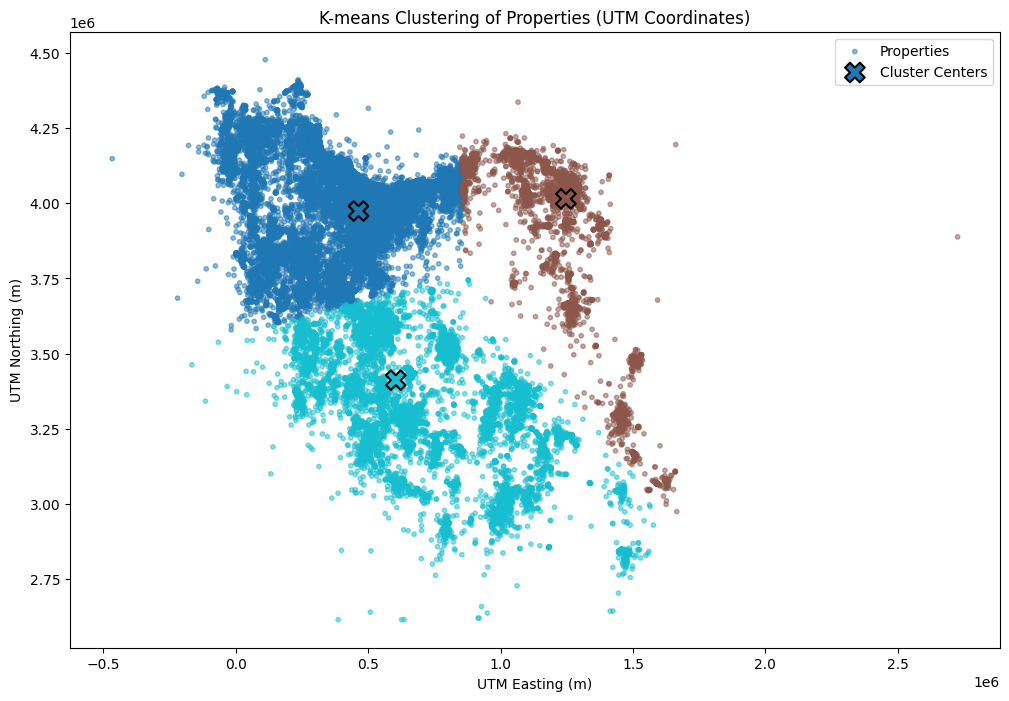

In [122]:
X = df_final

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(X)

sample_idx = np.random.choice(len(X), size=200000, replace=False)

X_sample = X.iloc[sample_idx].values
cluster_sample = df_final['cluster'].iloc[sample_idx].values

transformer = Transformer.from_crs("epsg:4326", "epsg:32639", always_xy=True)

df_final['UTM_E'], df_final['UTM_N'] = transformer.transform(
    df_final['location_longitude'].values,
    df_final['location_latitude'].values
)

# مراکز خوشه‌ها هم به UTM تبدیل کنیم
centroids = kmeans.cluster_centers_

# برای نمایش مراکز روی نقشه، لازم داریم مختصات مرکز خوشه‌ها در UTM
# چون ما latitude/longitude رو از فیچرها حذف کردیم، اینجا فقط قیمته → پس برای نمایش ساده‌تر فقط X=final_price_log و Y=neighborhood_encoded رو نمی‌خوایم
# پس مراکز جغرافیایی رو از داده‌ی اصلی محاسبه می‌کنیم
centroids_geo = df_final.groupby('cluster')[['UTM_E','UTM_N']].mean().reset_index()

# رسم نمودار
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_final['UTM_E'], df_final['UTM_N'],
                      c=df_final['cluster'], cmap='tab10', alpha=0.5, s=10, label="Properties")

# رسم مراکز خوشه‌ها
plt.scatter(centroids_geo['UTM_E'], centroids_geo['UTM_N'],
            c=centroids_geo['cluster'], cmap='tab10',
            marker='X', s=200, edgecolor='black', linewidth=1.5, label="Cluster Centers")

# عنوان و برچسب محور
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM Coordinates)")

# legend و colorbar
plt.legend()
plt.show()